# Week 02 exercises

- *a* can be drawn without raising the pencil, as it only have two nodes with odd degree.
- *b* cannot be drawn as it has more than two nodes with odd degree.
- *c* can be drawn, as every vertex has either degree two or four. 
- *d* can also be draw, as only two vertexes has odd degree (the ones in the lower right cornor)

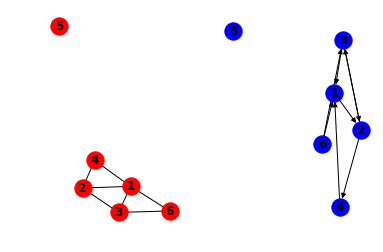

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# First undirected graph
G = nx.Graph()
G.add_nodes_from(range(1, 6))

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(1, 6)

G.add_edge(2, 3)
G.add_edge(2, 4)

G.add_edge(3, 6)

# Second directed graph
H = nx.DiGraph()
H.add_nodes_from(G)
H.add_edge(1, 2)

H.add_edge(2, 3)
H.add_edge(2, 4)

H.add_edge(3, 1)
H.add_edge(3, 2)

H.add_edge(4, 1)

H.add_edge(6, 1)
H.add_edge(6, 3)


plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

plt.subplot(122)
options = {
    'node_color': 'blue'
}
nx.draw(H, with_labels=True, font_weight='bold', **options)
plt.show()


In [13]:
print('Adjacency matrix for G')
print(nx.adjacency_matrix(G).todense())

print('\nAdjacency matrix for H')
print(nx.adjacency_matrix(H).todense())

Adjacency matrix for G
[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

Adjacency matrix for H
[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


In [21]:
print('Linked list representation of the graph G')
for node in G.nodes():
    print('Node', node, 'Egdes', G.edges(node))
    
print('Linked list representation of the graph H. Only the out going endges is shown for each node')
for node in H.nodes():
    print('Node', node, 'Outgoing edges', H.out_edges(node))

Linked list representation of the graph G
Node 1 Egdes [(1, 2), (1, 3), (1, 4), (1, 6)]
Node 2 Egdes [(2, 1), (2, 3), (2, 4)]
Node 3 Egdes [(3, 1), (3, 2), (3, 6)]
Node 4 Egdes [(4, 1), (4, 2)]
Node 5 Egdes []
Node 6 Egdes [(6, 1), (6, 3)]
Linked list representation of the graph H. Only the out going endges is shown for each node
Node 1 Outgoing edges [(1, 2)]
Node 2 Outgoing edges [(2, 3), (2, 4)]
Node 3 Outgoing edges [(3, 1), (3, 2)]
Node 4 Outgoing edges [(4, 1)]
Node 5 Outgoing edges []
Node 6 Outgoing edges [(6, 1), (6, 3)]


### Clustering Coefficient 

The clustering coefficient for a given node can be calculated by 
$$ C_i = \frac{2 L_i}{k_i (k_i -1)} $$

The average clustering coefficient for a graph can be calculated by 
$$ \langle C \rangle = \frac{1}{N} \sum_{i = 1}^N{C_i} $$

Or even simpler:

In [24]:
print('Average clustering coefficient for G', nx.average_clustering(G))

Average clustering coefficient for G 0.6388888888888888


Switching the labels of node 5 and 6 will just switch there places in the adjacency matrix (assuming they keep their edges).
The linked list representation have to be updated in all the places where 5 and 6 are, and simply change their labels around.

I would say you can infer the same kind of information from both representations of the graph.

In [55]:
def findPaths(G, u, n):
    if n == 0:
        return [[u]]
    paths = [[u] + path for neighbor in G.neighbors(u) for path in findPaths(G,neighbor, n - 1) if u not in path]
    return paths

print('Paths with length 3 between node 1 and 3 in graph G')
for path in findPaths(G, 1, 3):
    print(path)

Paths with length 3 between node 1 and 3 in graph G
[1, 2, 3, 6]
[1, 3, 2, 4]
[1, 4, 2, 3]
[1, 6, 3, 2]


In [56]:
def findDirectedPaths(G, u, n):
    if n == 0:
        return [[u]]
    paths = [[u] + path for _, neighbor in G.out_edges(u) for path in findPaths(G,neighbor, n - 1) if u not in path]
    return paths

print('Path with length 3 between node 1 and 3 in graph H')
for path in findDirectedPaths(H, 1, 3):
    print(path)

Path with length 3 between node 1 and 3 in graph H


The number of cycles with length 4

In [63]:
# TODO

## Bipartite graph

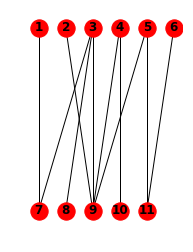

In [84]:
B = nx.Graph()
B.add_nodes_from(range(1, 12))
B.add_edge(1, 7)
B.add_edge(2, 9)
B.add_edge(3, 7)
B.add_edge(3, 8)
B.add_edge(3, 9)
B.add_edge(4, 9)
B.add_edge(4, 10)
B.add_edge(5, 9)
B.add_edge(5, 11)
B.add_edge(6, 11)

from networkx.algorithms import bipartite
X, Y = bipartite.sets(B)
pos = {}
pos.update((n, (i, 2)) for i, n in enumerate(X))
pos.update((n, (i, 1)) for i, n in enumerate(Y))

plt.subplot(121)
nx.draw(B, pos=pos, with_labels=True, font_weight='bold')
plt.show()

In [83]:
print(nx.adjacency_matrix(B).todense())

[[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]]


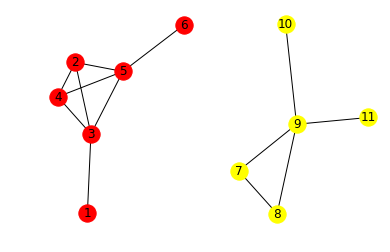

In [99]:
plt.subplot(121)
X_projected = bipartite.projected_graph(B, X)
nx.draw(X_projected, with_labels=True)
plt.subplot(122)
options = { 'node_color': 'yellow' }
Y_projected = bipartite.projected_graph(B, Y)
nx.draw(Y_projected, with_labels=True, **options)
plt.show()

In [100]:
def average_degree(G, nodes):
    return sum([G.degree(node) for node in nodes]) / len(nodes)

print('Average degree of top nodes', average_degree(B, X))
print('Average degree of bottom nodes', average_degree(B, Y))

Average degree of top nodes 1.6666666666666667
Average degree of bottom nodes 2.0


In [102]:
print('Average degree of top nodes in projected graph', average_degree(X_projected, X))
print('Average degree of bottom nodes in projected graph', average_degree(Y_projected, Y))

Average degree of top nodes in projected graph 2.6666666666666665
Average degree of bottom nodes in projected graph 2.0


It make sense that the average degree changes, as nodes one edge to a node in the other set could result in many edges in the projection.
Take the extrem example of having every node in the top set connected to the only one node in the other set, but all to the same. The average degree in the original graph is therefore one, where the average degree in the new one would be equal to the number of nodes in the top set.